In [13]:
#Name :Nalawade Prafulla Chandrashekhar.
#class: B.E.A.I & D.S.
#Roll No:42
#Subject : Deep Learning (CL-IV)

In [14]:
# Problem Statement : Generative Adversarial Networks (GANs) are a type of deep learning model used for image
# generation. In this practical, we implement a Deep Convolutional GAN (DCGAN) to generate
# realistic images of faces or digits based on an input dataset, such as MNIST (handwritten digits) or
# CelebA (human faces).

In [15]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
import tensorflow as tf
from tensorflow.keras import layers
from torchvision import datasets, transforms, utils
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import os
import time

In [32]:
# Load and preprocess MNIST
(train_images, _), (_, _) = tf.keras.datasets.mnist.load_data()
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
train_images = (train_images - 127.5) / 127.5  # Normalize to [-1, 1]
BUFFER_SIZE = 60000
BATCH_SIZE = 256

train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)


In [17]:
# Generator Model
def make_generator_model():
    model = tf.keras.Sequential([
        layers.Dense(7*7*256, use_bias=False, input_shape=(100,)),
        layers.BatchNormalization(),
        layers.LeakyReLU(),

        layers.Reshape((7, 7, 256)),
        layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False),
        layers.BatchNormalization(),
        layers.LeakyReLU(),

        layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False),
        layers.BatchNormalization(),
        layers.LeakyReLU(),

        layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh')
    ])
    return model

In [18]:
# Discriminator model
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',
                                     input_shape=[28, 28, 1]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))
    return model


In [19]:
# Loss and optimizers
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

generator = make_generator_model()
discriminator = make_discriminator_model()

generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [28]:
# Training constants
EPOCHS = 50
noise_dim = 100
num_examples_to_generate = 16


In [21]:
    # Seed for visualization
seed = tf.random.normal([num_examples_to_generate, noise_dim])


In [22]:
# Training step
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)

        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))


In [23]:
# Save generated images
def generate_and_save_images(model, epoch, test_input):
    predictions = model(test_input, training=False)

    fig = plt.figure(figsize=(4,4))
    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i+1)
        plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
        plt.axis('off')

    if not os.path.exists('images'):
        os.makedirs('images')
    plt.savefig('images/image_at_epoch_{:04d}.png'.format(epoch))
    plt.close()

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
# Training loop
def train(dataset, epochs):
    for epoch in range(1, epochs + 1):
        start = time.time()

        for image_batch in dataset:
            train_step(image_batch)

        if epoch % 10 == 0 or epoch == 1:
            generate_and_save_images(generator, epoch, seed)

        print ('Time for epoch {} is {:.2f} sec'.format(epoch, time.time()-start))


In [30]:
# Train the GAN
train(train_dataset, EPOCHS)


Time for epoch 1 is 13.09 sec
Time for epoch 2 is 13.32 sec
Time for epoch 3 is 13.44 sec
Time for epoch 4 is 12.94 sec
Time for epoch 5 is 12.76 sec
Time for epoch 6 is 12.84 sec
Time for epoch 7 is 12.78 sec
Time for epoch 8 is 12.95 sec
Time for epoch 9 is 13.02 sec
Time for epoch 10 is 13.49 sec
Time for epoch 11 is 12.88 sec
Time for epoch 12 is 12.84 sec
Time for epoch 13 is 12.84 sec
Time for epoch 14 is 12.91 sec
Time for epoch 15 is 12.92 sec
Time for epoch 16 is 12.90 sec
Time for epoch 17 is 12.87 sec
Time for epoch 18 is 12.85 sec
Time for epoch 19 is 12.86 sec
Time for epoch 20 is 13.08 sec
Time for epoch 21 is 12.92 sec
Time for epoch 22 is 12.92 sec
Time for epoch 23 is 12.90 sec
Time for epoch 24 is 12.88 sec
Time for epoch 25 is 12.87 sec
Time for epoch 26 is 12.85 sec
Time for epoch 27 is 12.85 sec
Time for epoch 28 is 12.85 sec
Time for epoch 29 is 12.83 sec
Time for epoch 30 is 13.04 sec
Time for epoch 31 is 12.86 sec
Time for epoch 32 is 12.86 sec
Time for epoch 33

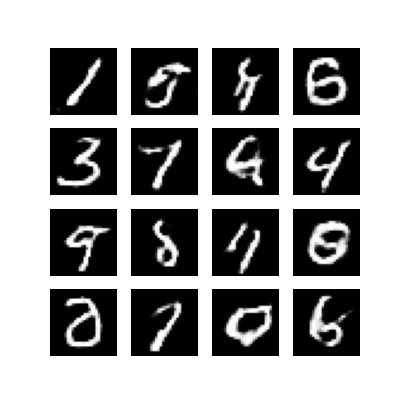

In [31]:
# Display a generated image after the final epoch
import PIL
from IPython.display import Image, display

def display_final_image():
    final_image_path = 'images/image_at_epoch_{:04d}.png'.format(EPOCHS)
    display(Image(filename=final_image_path))

display_final_image()